# Unsupervised ML Algorithm
# use to reduce curse of Dimentinality


Principal Component Analysis (PCA) is a statistical technique used to identify patterns in data and to reduce the dimensionality of the data by projecting it onto a lower-dimensional space

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from numpy.polynomial import Polynomial
import plotly.express as px

In [2]:
df = pd.DataFrame(load_iris().data,columns=load_iris().feature_names)

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df.cov()  # Spread and Direction of data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


# Eigen Decomposition

In [5]:
Eigen Value
Eigen Vector

SyntaxError: invalid syntax (<ipython-input-5-e9d37c2df3ee>, line 1)

PCA (Principal Component Analysis) is a dimensionality reduction technique commonly used in data science and machine learning. In PCA, eigenvalues and eigenvectors are important concepts.

Eigenvalues represent the magnitude of variation in each principal component (the dimensions with the largest variance in the data), while eigenvectors represent the direction of this variation. In other words, eigenvalues tell us how much information is contained in each principal component, and eigenvectors tell us in which direction this information lies.

Mathematically, given a dataset, PCA finds the eigenvectors and eigenvalues of its covariance matrix. The eigenvectors are then used to transform the original dataset into a new coordinate system, where the dimensions are the principal components. The eigenvalues determine how much variance is retained in each principal component. The principal components are ordered in decreasing order of eigenvalues, meaning that the first principal component has the largest eigenvalue and explains the most variation in the data.

In summary, eigenvalues and eigenvectors are key concepts in PCA that help us understand how much variance is contained in each principal component and in which direction this variation lies.

Data preparation: First, we need to prepare the data by standardizing it. This means scaling each feature to have zero mean and unit variance. Standardization is important in PCA because it ensures that each feature has the same weight when calculating principal components.

Covariance matrix: Next, we calculate the covariance matrix of the standardized data. The covariance matrix is a square matrix that shows how much two variables vary together. In this case, the covariance matrix will be a 4x4 matrix since there are 4 features in the dataset.

Eigen decomposition: We then perform eigen decomposition on the covariance matrix to find the eigenvalues and eigenvectors. The eigenvectors represent the principal components, and the eigenvalues represent the amount of variance explained by each principal component. We sort the eigenvectors in decreasing order of their corresponding eigenvalues to identify the most important principal components.

Projection: Finally, we project the standardized data onto the principal components to obtain a new set of features, where each feature corresponds to a principal component. The new features are ordered based on the importance of the principal components.

In [6]:
matrix = np.array([[2,3],[4,3]])
w,v =np.linalg.eig(matrix) # it return both and w=eigen value and v=eigen vector

In [7]:
w,v

(array([-1.,  6.]),
 array([[-0.70710678, -0.6       ],
        [ 0.70710678, -0.8       ]]))

In [8]:
a = 1          #array([-1.,  6.]) this is eigen value
b = -5 
c = -6
p = Polynomial([c,b,a])
p.roots()

array([-1.,  6.])

In [9]:
cov_matrix =df.cov()
cov_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In [10]:
eigen = np.linalg.eigvals(cov_matrix)
eigen  # this eigen value

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [11]:
eigen_values ,eigen_vector =  np.linalg.eig(cov_matrix)
eigen_value

NameError: name 'eigen_value' is not defined

WHAY WE USE COV in PCA>>>IT GIVES DIRECTION 
WHY WE CAN NOT USE MEAN IN PCA
Principal Component Analysis (PCA) is a statistical technique used to identify patterns in data and to reduce the dimensionality of the data by projecting it onto a lower-dimensional space

We cannot use the mean in PCA because the mean does not capture the variance or covariance between variables in the data.

# PCA WITH Iris Data

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


import plotly.express as px

In [13]:
df = sns.load_dataset('iris')
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [14]:
x = df.drop('species',axis=1)
y = df['species']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

# Preprocessing
Preprocessing is mandatory because outlier in data may lead wrong result

In [16]:
std_scalar = StandardScaler()
std_array = std_scalar.fit_transform(x_train)
x_train_std = pd.DataFrame(std_array,columns=x_train.columns)

In [17]:
x_train_std

,sepal_length,sepal_width,petal_length,petal_width
0,-1.721568,-0.332101,-1.345722,-1.323276
1,-1.124492,-1.227655,0.414505,0.651763
2,1.144395,-0.555990,0.584850,0.256755
3,-1.124492,0.115676,-1.288941,-1.454945
4,-0.408002,-1.227655,0.130598,0.125086
...,...,...,...,...
115,-1.124492,1.235118,-1.345722,-1.454945
116,-1.363322,0.339564,-1.402504,-1.323276
117,-0.408002,2.578448,-1.345722,-1.323276
118,1.263810,0.115676,0.641631,0.388424


# apply PCA

In [18]:
pca = PCA(n_components=None)
x_train_pca =pca.fit_transform(x_train_std)
x_train_pca

array([[-2.35430673e+00, -1.03369922e+00,  1.52775702e-01,
        -3.84553375e-02],
       [ 3.28116465e-01, -1.48461375e+00,  1.01638985e+00,
        -1.53104777e-01],
       [ 1.22908440e+00, -8.85247641e-02, -7.11981506e-01,
         3.65140715e-02],
       [-2.19452009e+00, -4.14496785e-01, -2.57827412e-01,
        -4.35354301e-02],
       [ 2.42488226e-01, -1.27773347e+00,  1.21753762e-01,
        -8.72508625e-03],
       [ 1.52294955e+00, -8.77493281e-01,  6.60517126e-03,
         2.06085665e-01],
       [ 2.58154362e-01, -8.14565655e-01,  1.50015449e-01,
        -1.18688745e-01],
       [ 1.08813566e+00, -2.83078283e-01, -1.70505915e-01,
        -1.91388992e-01],
       [ 2.78165650e+00,  8.02602481e-01, -5.40447994e-01,
         3.02425920e-01],
       [ 2.45214546e+00,  2.47719638e+00, -1.79181696e-01,
        -2.43573188e-01],
       [ 2.73500972e+00,  7.51203467e-01, -5.81258233e-01,
        -9.47231658e-02],
       [ 6.44517979e-01, -2.07689984e-01,  9.25728362e-02,
      

In [19]:
PC_name_list= [f"PC{i}" for i in range(1,x_train_pca.shape[1]+1)]
PC_name_list

['PC1', 'PC2', 'PC3', 'PC4']

In [21]:
dataframe_pc = pd.DataFrame(x_train_pca,columns=PC_name_list)
dataframe_pc

,PC1,PC2,PC3,PC4
0,-2.354307,-1.033699,0.152776,-0.038455
1,0.328116,-1.484614,1.016390,-0.153105
2,1.229084,-0.088525,-0.711982,0.036514
3,-2.194520,-0.414497,-0.257827,-0.043535
4,0.242488,-1.277733,0.121754,-0.008725
...,...,...,...,...
115,-2.510859,0.630327,-0.017224,-0.125734
116,-2.368605,-0.282696,0.033381,0.026607
117,-2.398907,2.144118,-0.156755,-0.017719
118,1.229520,0.591117,-0.558379,0.015341


# Model training

# KNN with & without PCA

In [22]:
# withPCA

knn= KNeighborsClassifier()
knn.fit(dataframe_pc,y_train)
knn.score(dataframe_pc,y_train)

0.975

In [23]:
# without PCA

knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.9666666666666667

# Logistic with & without PCA

In [24]:
# withPCA

logistic= LogisticRegression()
logistic.fit(dataframe_pc,y_train)
logistic.score(dataframe_pc,y_train)

0.9583333333333334

In [25]:
# without PCA

logistic= LogisticRegression()
logistic.fit(x_train,y_train)
logistic.score(x_train,y_train)

0.975

In [26]:
# from above there is no change .i.e no dimensionality reduction and and no change in accuracy too


In [27]:
pca.get_covariance()

array([[ 1.00840336, -0.11327081,  0.88779917,  0.82719054],
       [-0.11327081,  1.00840336, -0.40185033, -0.34158723],
       [ 0.88779917, -0.40185033,  1.00840336,  0.97179113],
       [ 0.82719054, -0.34158723,  0.97179113,  1.00840336]])

### we will find best feature whose cumulative sum is less than 90

In [28]:
pca.explained_variance_ratio_

array([0.72677234, 0.23066667, 0.03781901, 0.00474197])

# cumulative sum

In [49]:
np.cumsum(pca.explained_variance_ratio_)*100

array([ 72.67723405,  95.74390107,  99.52580251, 100.        ])

In [50]:
arr = np.cumsum(pca.explained_variance_ratio_)
arr

array([0.72677234, 0.95743901, 0.99525803, 1.        ])

In [51]:
np.where(arr>0.90)[0][0]

1

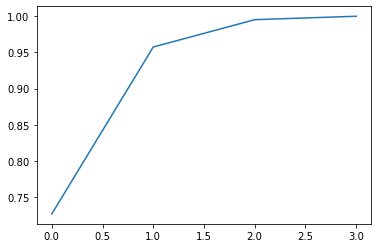

In [52]:
plt.plot(arr)

In [53]:
from above plot we can infered that where graph getting stagnet point that will best feature selection point

here x=2 getting stagnet point number of PC will .ie pc1,pc2

SyntaxError: invalid syntax (<ipython-input-53-13535ed59afc>, line 1)

# 2nd method

In [54]:
st_scl =StandardScaler()
st_arr =st_scl.fit_transform(x_train)
x_train_std = pd.DataFrame(st_arr,columns=x_train.columns)
x_train_std.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,-1.721568,-0.332101,-1.345722,-1.323276


In [55]:
Accuracy_list= []
for i in range(1,x_train_std.shape[1]+1):
    pca1=PCA(n_components=i)
    x_train_pca1=pca1.fit_transform(x_train_std)
    pc_name=[f'PC{i}' for i in range(1,x_train_pca1.shape[1]+1)]
    x_pc_data= pd.DataFrame(x_train_pca1,columns=pc_name)
    # train model
    
    knnnn= KNeighborsClassifier()
    knnnn.fit(x_pc_data,y_train)
    Accuracy_list.append(knnnn.score(x_pc_data,y_train))
Accuracy_list

[0.9416666666666667, 0.9416666666666667, 0.975, 0.975]

In [56]:
[0.9416666666666667 >>>>PC1, 0.9416666666666667>PC2, 0.975>>PC3, 0.975>>>PC4]

SyntaxError: invalid syntax (<ipython-input-56-9a437e8fe9e1>, line 1)

# test result 
import

In [57]:
std_scalar = StandardScaler()
std_array = std_scalar.fit_transform(x_train)
x_train_std = pd.DataFrame(std_array,columns=x_train.columns)

pca = PCA(n_components=3)
x_train_pca =pca.fit_transform(x_train_std)
x_train_pca
PC_name_list= [f"PC{i}" for i in range(1,x_train_pca.shape[1]+1)]
PC_name_list
dataframe_pc = pd.DataFrame(x_train_pca,columns=PC_name_list)
dataframe_pc
# withPCA

knn= KNeighborsClassifier()
knn.fit(dataframe_pc,y_train)
knn.score(dataframe_pc,y_train)

0.975

# testing unseen data

In [58]:
x_test.iloc[2]

sepal_length    4.9
sepal_width     2.4
petal_length    3.3
petal_width     1.0
Name: 57, dtype: float64

In [59]:
std_test=std_scalar.transform([x_test.iloc[1]])
test_pca=pca.transform(std_test)
knn.predict(test_pca)

array(['virginica'], dtype=object)

In [60]:
import pickle

In [61]:
import pickle

In [ ]:
with open("model",'wb') as file:
    p

In [104]:
# file for >>Std_scale
       #    >>PCA
        #   >>model
with open("Std_scale","wb") as f:
    pickle.dump(std_scalar,f)
    
with open("PCA","wb") as f:
    pickle.dump(pca,f)
    
with open("MODEL","wb") as f:
    pickle.dump(knn,f)


In [ ]:
Note if when do Feature SCaling >>we create pickle file for std or max scaler>>
pass data through the std sclaer so scale of unseen data will rescaled